In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob as gb
import cv2
import warnings
warnings.filterwarnings("ignore")
import imageio 

from keras import Sequential , layers
from keras.layers import Dropout , Dense , MaxPool2D , Conv2D , BatchNormalization

## Load data

In [3]:
image_train = r"D:\archive\dogvscat\train"
image_test = r"D:\archive\dogvscat\test"


# Open Folder

# Train images

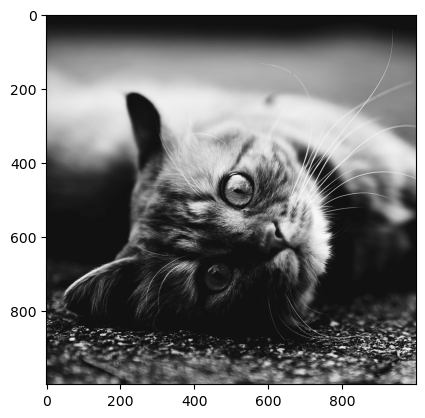

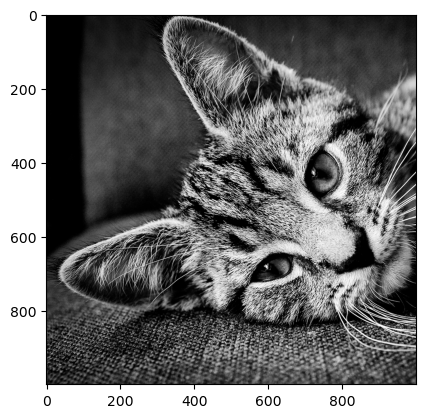

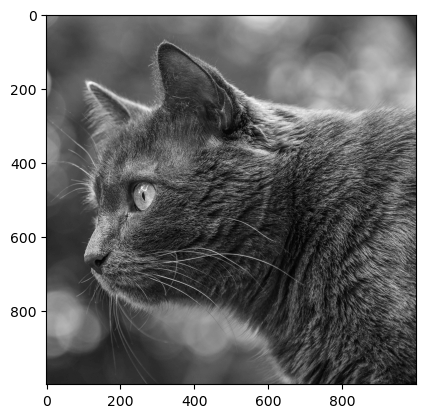

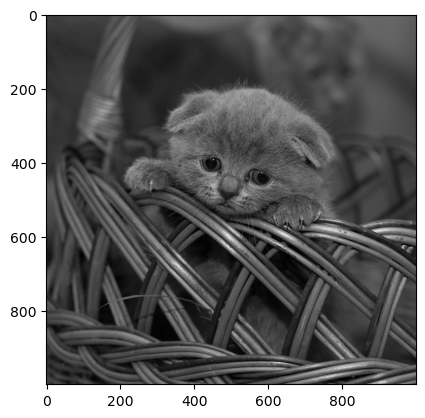

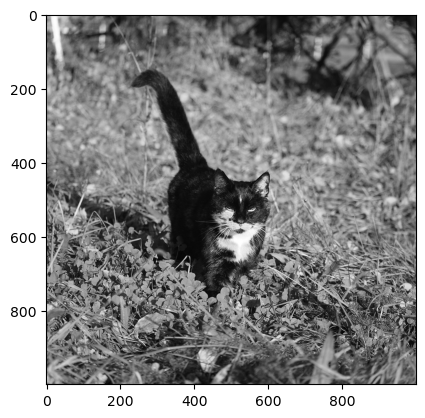

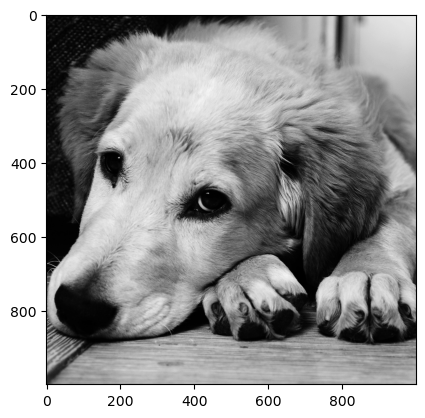

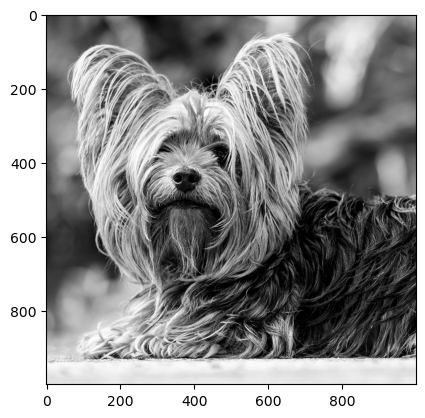

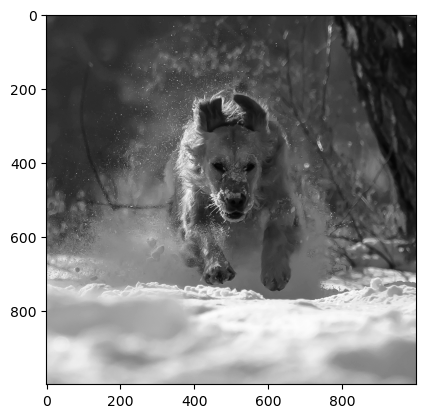

In [4]:
image_train = r"D:\archive\dogvscat\train"

# {"0" : cat , "1" : "god"}

CATEGORIES = ["0" , "1"]         

for category in CATEGORIES:
    path = os.path.join(image_train, category)
    for i, img_name in enumerate(os.listdir(path)):
        if i == 5:
            break
        img_array = imageio.imread(os.path.join(path, img_name), as_gray=True)
        plt.imshow(img_array, cmap='gray')
        plt.show()

# Test images

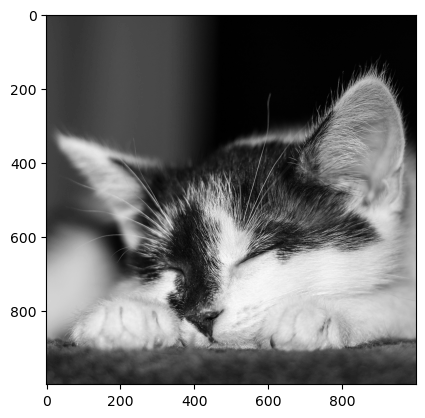

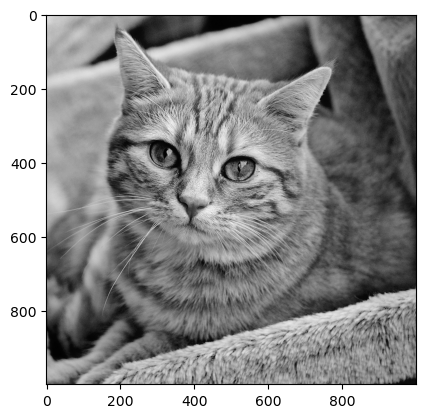

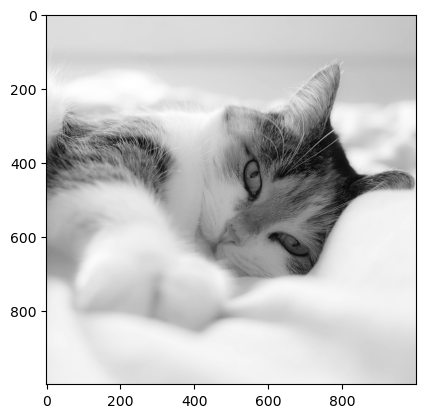

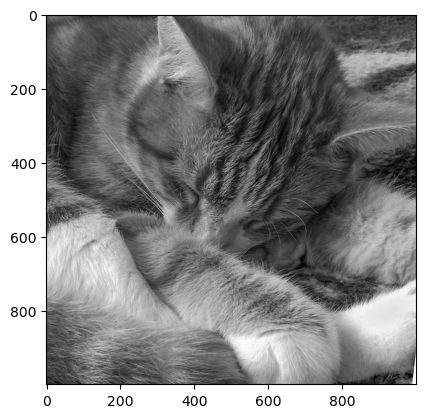

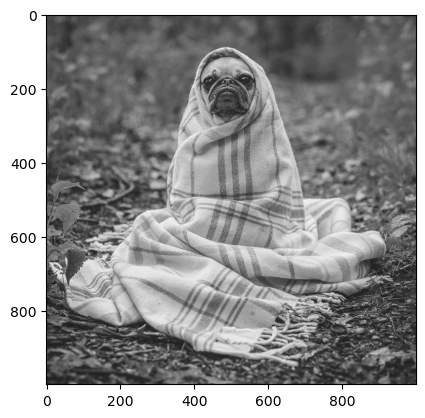

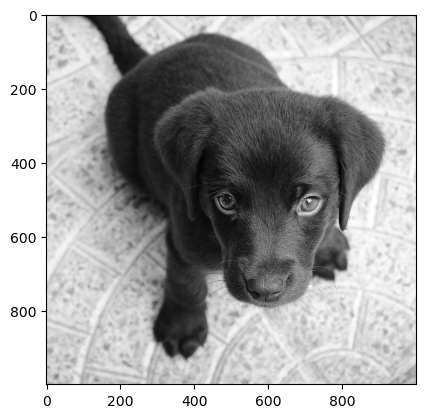

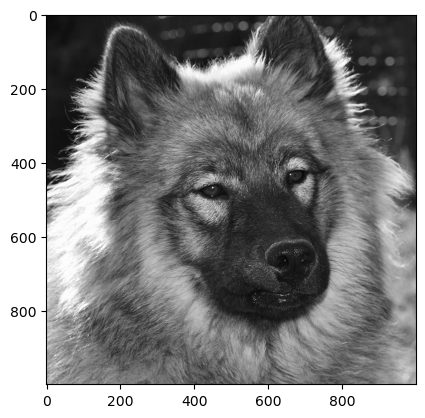

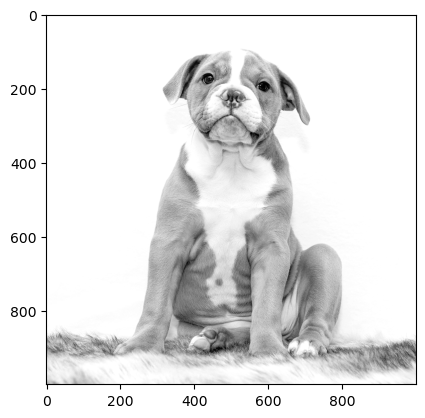

In [5]:
image_test = r"D:\archive\dogvscat\test"

# {"0" : cat , "1" : "god"}

CATEGORIES = ["0" , "1"]         

for category in CATEGORIES:
    path = os.path.join(image_test, category)
    for i, img_name in enumerate(os.listdir(path)):
        if i == 5:
            break
        img_array_test = imageio.imread(os.path.join(path, img_name), as_gray=True)
        plt.imshow(img_array_test, cmap='gray')
        plt.show()

## Normalization 

In [6]:
img_array = img_array / 255
img_array

Array([[0.26289022, 0.2588    , 0.2554353 , ..., 0.38144705, 0.39713332,
        0.38447452],
       [0.2705647 , 0.2705647 , 0.260251  , ..., 0.39180395, 0.3996471 ,
        0.39572552],
       [0.2632353 , 0.27985883, 0.27985883, ..., 0.39084315, 0.39084315,
        0.3986863 ],
       ...,
       [0.6995216 , 0.701098  , 0.701098  , ..., 0.54104704, 0.54609805,
        0.53433335],
       [0.69717646, 0.6932549 , 0.694149  , ..., 0.54104704, 0.5414941 ,
        0.54541564],
       [0.6932549 , 0.6893333 , 0.69022745, ..., 0.55718035, 0.5493372 ,
        0.5454588 ]], dtype=float32)

In [7]:
print("Display tha shape Before resize = ",img_array.shape)

Display tha shape Before resize =  (1000, 1000)


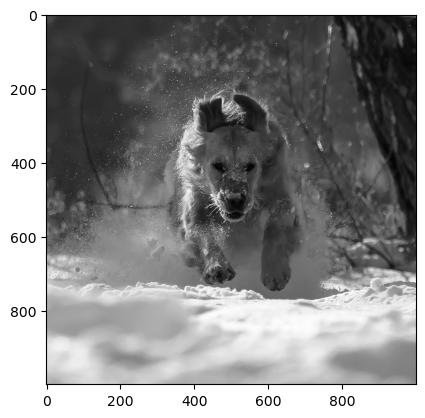

In [8]:
plt.imshow(img_array , cmap="gray")
plt.show()

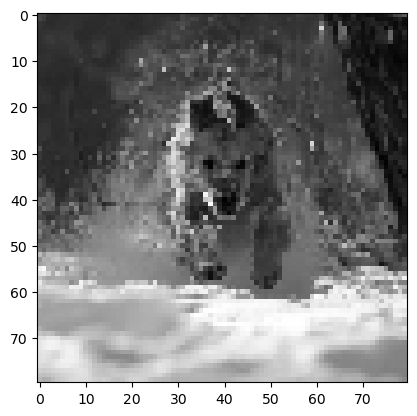

In [9]:
## resize all images (80 , 80)
img_size = 80

new_array = cv2.resize(img_array , (img_size , img_size))
plt.imshow(new_array , cmap="gray")
plt.show()

In [10]:
print("Display tha shape after resize = ",new_array.shape)

Display tha shape after resize =  (80, 80)


In [15]:
def create_training_data():
    training_data = []  # Initialize the list
    for category in CATEGORIES:
        path = os.path.join(image_train, category)
        class_num = CATEGORIES.index(category)

        if not os.path.exists(path):
            print(f"Error: Directory not found: {path}")
            continue

        for img in tqdm(os.listdir(path)):  # Use tqdm correctly
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (80, 80))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")

    return training_data  # Return the created training data

training_data = create_training_data()

print(len(training_data))


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 62.78it/s]

500


In [16]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


0
0
1
0
1
1
0
0
0
1


In [17]:
img_size = 80
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, img_size, img_size, 1))

X = np.array(X).reshape(-1, img_size, img_size)

[[[[ 79]
   [ 79]
   [ 77]
   ...
   [124]
   [125]
   [ 78]]

  [[ 80]
   [ 78]
   [ 80]
   ...
   [125]
   [125]
   [ 75]]

  [[ 79]
   [ 80]
   [ 81]
   ...
   [123]
   [121]
   [ 74]]

  ...

  [[ 76]
   [ 71]
   [ 74]
   ...
   [106]
   [106]
   [107]]

  [[ 86]
   [ 82]
   [ 86]
   ...
   [114]
   [107]
   [104]]

  [[ 39]
   [ 31]
   [ 40]
   ...
   [115]
   [112]
   [111]]]]


In [19]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1),
                  padding="same", activation="relu",
                  input_shape=(img_size, img_size, 1)), # Add channel dimension
    
    layers.BatchNormalization(),
    
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    
    layers.Dropout(0.3),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5),
                  strides=(1, 1), padding="same", activation="relu"),
    
    layers.BatchNormalization(),
    
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    
    layers.Dropout(0.4),
    
    layers.Flatten(),
    
    layers.Dense(1000, activation="relu"),
    
    layers.Dense(2, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 80, 80, 32)        832       
                                                                 
 batch_normalization_2 (Bat  (None, 80, 80, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 40, 40, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 40, 40, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        51264     
                                                                 
 batch_normalization_3 (Bat  (None, 40, 40, 64)       

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X, y = np.array(y), epochs=7)
history

Epoch 1/7
16/16 [==============================] - 8s 506ms/step - loss: 0.2727 - accuracy: 0.9020
Epoch 2/7
16/16 [==============================] - 8s 495ms/step - loss: 0.1836 - accuracy: 0.9320
Epoch 3/7
16/16 [==============================] - 8s 501ms/step - loss: 0.1192 - accuracy: 0.9560
Epoch 4/7
16/16 [==============================] - 8s 511ms/step - loss: 0.0793 - accuracy: 0.9820
Epoch 5/7
16/16 [==============================] - 9s 576ms/step - loss: 0.0629 - accuracy: 0.9780
Epoch 6/7
16/16 [==============================] - 8s 513ms/step - loss: 0.0351 - accuracy: 0.9920
Epoch 7/7
16/16 [==============================] - 8s 501ms/step - loss: 0.0214 - accuracy: 0.9940


In [25]:
loss , accuracy = model.evaluate(X , y = np.array(y))

print("loss is == ", loss)
print("accuracy is == ", accuracy)

16/16 [==============================] - 1s 72ms/step - loss: 0.0287 - accuracy: 0.9940
loss is ==  0.028713760897517204
accuracy is ==  0.9940000176429749


In [26]:
plt.plot(history.history["loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


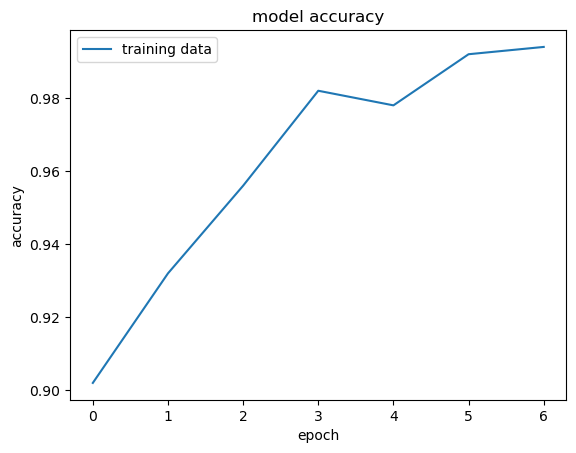

In [27]:
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper left')

# END

# BY : SAYED ALI